VII Auswertung
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from scipy.stats import chi2

K_alpha Energien
---

In [14]:
# Werte aus Tabelle 1 alpha
# Entspricht (Fe, Mo, Cu, Ti, Zr, Ag, Ni, Zn )
Z = np.array([26, 42, 29, 22, 40, 47, 28, 30])
K_alpha = np.array([6.42, 17.82, 8.12, 4.62, 16.13, 22.41, 7.54, 8.76]) # keV
sig_K_alpha = np.array([0.18, 0.20, 0.18, 0.19, 0.19, 0.21, 0.19, 0.19])
sqrt_K_alpha = sqrt(K_alpha)
sig_sqrt_K_alpha = sig_K_alpha / (2 * sqrt_K_alpha)

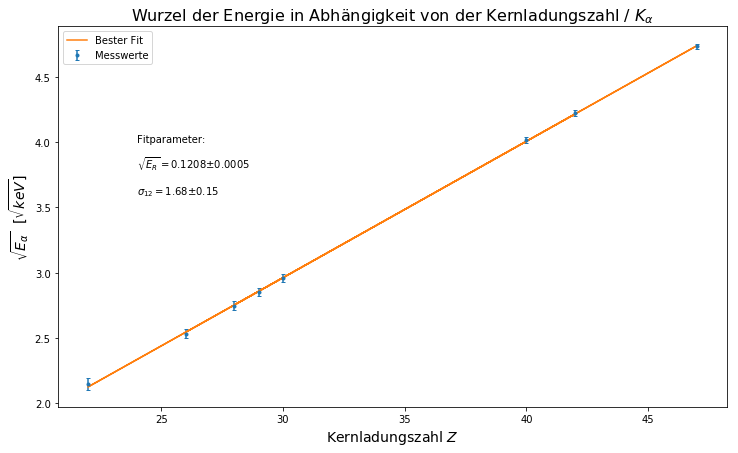

In [15]:
# Fit
n1 = 1
n2 = 2
def line(x, sqrt_E_R, sig_12):
    return sqrt_E_R * (x - sig_12) * sqrt(n1 ** (-2) - n2 ** (-2))

popt, pcov = curve_fit(line, Z, sqrt_K_alpha, sigma = sig_sqrt_K_alpha)
sqrt_E_R = popt[0] # sqrt keV
sig_sqrt_E_R = sqrt(pcov[0,0])
sig_12 = popt[1]
sig_sig_12 = sqrt(pcov[1,1])

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(Z, sqrt_K_alpha, yerr = sig_sqrt_K_alpha, fmt = '.', capsize = 2,
            label = 'Messwerte')
plt.title('Wurzel der Energie in Abhängigkeit von der Kernladungszahl / $K_\\alpha$', size = 16)
plt.xlabel('Kernladungszahl $Z$', size = 14)
plt.ylabel('$\sqrt{E_\\alpha}$  [$\sqrt{keV}$]', size = 14)

plt.plot(Z, line(Z, *popt), label = 'Bester Fit')
plt.text(24, 4, 'Fitparameter:')
plt.text(24, 3.8, '$\sqrt{E_R} = $' + str(np.round(sqrt_E_R,4)) + '$\pm$' + str(np.round(sig_sqrt_E_R,4)))
plt.text(24, 3.6, '$\\sigma_{12} = $' + str(np.round(sig_12,2)) + '$\pm$' + str(np.round(sig_sig_12,2)))

plt.legend(loc = 'best')
plt.savefig('images/256/V256Diagramm1.png')
plt.show()

In [16]:
# Werte
print('Wurzel der Rydberg-Energie:')
print('sqrt_E_R =', np.round(sqrt_E_R,4), '+/-', np.round(sig_sqrt_E_R,4))
print('Abschirmungskonstante:')
print('sig_12 =', np.round(sig_12,2), '+/-', np.round(sig_sig_12,2))

# Rydberg-Energie
E_R = 1e3 * sqrt_E_R ** 2 # eV
sig_E_R = 1e3 * 2 * sqrt_E_R * sig_sqrt_E_R
print('\nRydberg-Energie:')
print('E_R =', np.round(E_R,2), '+/-', np.round(sig_E_R,2)) 

Wurzel der Rydberg-Energie:
sqrt_E_R = 0.1208 +/- 0.0005
Abschirmungskonstante:
sig_12 = 1.68 +/- 0.15

Rydberg-Energie:
E_R = 14.58 +/- 0.12


In [13]:
# Güte des Fits
chi2_= np.sum((line(Z, *popt) - sqrt_K_alpha) ** 2 / sig_sqrt_K_alpha ** 2) 
dof = len(sqrt_K_alpha) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 0.3358012510729387
chi2_red = 0.06716025021458774
Wahrscheinlichkeit = 100.0 %


K_beta Energien
---

In [21]:
# Werte aus Tabelle 1 beta
# Entspricht (Fe, Mo, Cu, Zr, Ag, Ni, Zn)
Z2 = np.array([26, 42, 29, 40, 47, 28, 30])
K_beta = np.array([7.09, 19.95, 8.93, 18.07, 25.18, 8.30, 9.71]) # keV
sig_K_beta = np.array([0.22, 0.21, 0.39, 0.20, 0.29, 0.32, 0.24])
sqrt_K_beta = sqrt(K_beta)
sig_sqrt_K_beta = sig_K_beta / (2 * sqrt_K_beta)

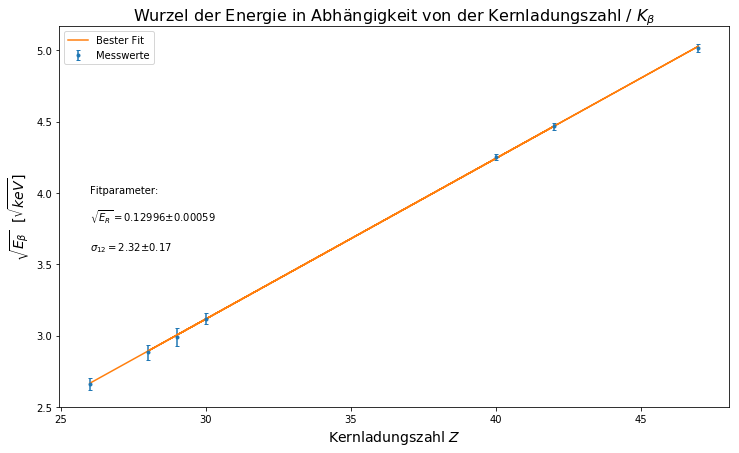

In [22]:
# Fit
popt, pcov = curve_fit(line, Z2, sqrt_K_beta, sigma = sig_sqrt_K_beta)
sqrt_E_R = popt[0]
sig_sqrt_E_R = sqrt(pcov[0,0])
sig_12 = popt[1]
sig_sig_12 = sqrt(pcov[1,1])

# Plot
plt.figure(figsize = (12, 7))
plt.errorbar(Z2, sqrt_K_beta, yerr = sig_sqrt_K_beta, fmt = '.', capsize = 2,
            label = 'Messwerte')
plt.title('Wurzel der Energie in Abhängigkeit von der Kernladungszahl / $K_\\beta$', size = 16)
plt.xlabel('Kernladungszahl $Z$', size = 14)
plt.ylabel('$\sqrt{E_\\beta}$  [$\sqrt{keV}$]', size = 14)

plt.plot(Z2, line(Z2, *popt), label = 'Bester Fit')
plt.text(26, 4, 'Fitparameter:')
plt.text(26, 3.8, '$\sqrt{E_R} = $' + str(np.round(sqrt_E_R,5)) + '$\pm$' + str(np.round(sig_sqrt_E_R,5)))
plt.text(26, 3.6, '$\\sigma_{12} = $' + str(np.round(sig_12,2)) + '$\pm$' + str(np.round(sig_sig_12,2)))

plt.legend(loc = 'best')
plt.savefig('images/256/V256Diagramm2.png')
plt.show()

In [23]:
# Werte
print('Wurzel der Rydberg-Energie:')
print('sqrt_E_R =', np.round(sqrt_E_R,4), '+/-', np.round(sig_sqrt_E_R,4))
print('Abschirmungskonstante:')
print('sig_12 =', np.round(sig_12,2), '+/-', np.round(sig_sig_12,2))

# Rydberg-Energie
E_R = 1e3 * sqrt_E_R ** 2 # eV
sig_E_R = 1e3 * 2 * sqrt_E_R * sig_sqrt_E_R
print('\nRydberg-Energie:')
print('E_R =', np.round(E_R,2), '+/-', np.round(sig_E_R,2)) 

Wurzel der Rydberg-Energie:
sqrt_E_R = 0.13 +/- 0.0006
Abschirmungskonstante:
sig_12 = 2.32 +/- 0.17

Rydberg-Energie:
E_R = 16.89 +/- 0.15


In [24]:
# Güte des Fits
chi2_= np.sum((line(Z2, *popt) - sqrt_K_beta) ** 2 / sig_sqrt_K_beta ** 2) 
dof = len(sqrt_K_beta) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 0.40137657767060514
chi2_red = 0.08027531553412103
Wahrscheinlichkeit = 100.0 %
